---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [87]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [88]:
import pandas as pd
import numpy as np

def answer_one():
    
    df = pd.read_csv("fraud_data.csv")
    value_counts = df.Class.value_counts()
    
    return value_counts[1]/(value_counts[1]+value_counts[0])

answer_one()

0.016410823768035772

In [89]:
# Use X_train, X_test, y_train, y_test for all of the following questions

from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#split data into training and testing sets

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [90]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import recall_score, accuracy_score

def answer_two():
    
    dummy_clf = (DummyClassifier(strategy = "most_frequent")
                 .fit(X_train,y_train))
    #train a dummy classifier with the training data
    
    y_pred = dummy_clf.predict(X_test)
    #returns predicted target values for X_test
    
    accuracy, recall = accuracy_score(y_test,y_pred), recall_score(y_test,y_pred)
    #accuracy - accurately predicted samples/ total samples
    #recall - True positives / True Positives + False Negatives
    
    return (accuracy, recall)

answer_two()

(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [91]:
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.svm import SVC

def answer_three():

    clf = (SVC()
           .fit(X_train,y_train))
    
    y_pred = clf.predict(X_test)
    
    accuracy, recall, precision = (accuracy_score(y_test,y_pred), 
                                   recall_score(y_test,y_pred), 
                                   precision_score(y_test,y_pred))
    
    #accuracy - Accurately predicted samples/ total samples
    #recall - True positives / (True Positives + False Negatives)
    #precision - True positives / (True Positives + False Positives)
        
    return accuracy, recall, precision

answer_three()

(0.9900442477876106, 0.35, 0.9333333333333333)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [92]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

def answer_four():

    clf = (SVC(C = 1e9, gamma = 1e-07)
           .fit(X_train, y_train))
    #fit SVC classifier on training data
    
    y_pred = clf.decision_function(X_test)
        
    y_pred_threshold = np.zeros(len(y_pred))
    
    for i in range(len(y_pred)):
        if y_pred[i] >= -220:
            y_pred_threshold[i] = 1
        else:
            pass   
    #classify any sample with decision function value greater than or equal to -220 as fraud
            
    confusion_matrix_ = confusion_matrix(y_test,y_pred_threshold)
    
#          Predicted Class        
#           P         N
#Actual P  TP        FN
#Class  N  FP        TN
    
    return confusion_matrix_

answer_four()

array([[5320,   24],
       [  14,   66]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

<IPython.core.display.Javascript object>


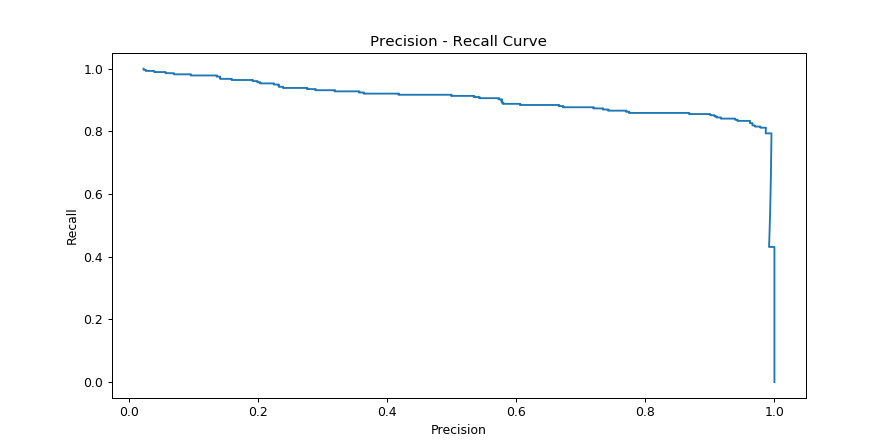

<IPython.core.display.Javascript object>


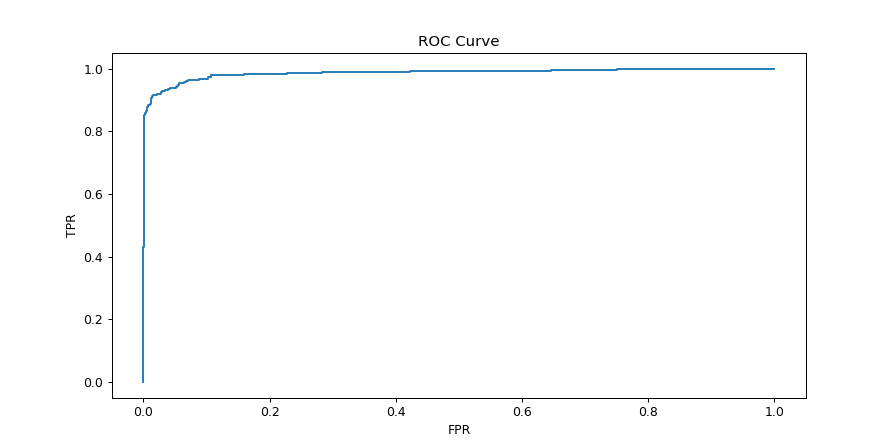

(0.87, 0.98)

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

def answer_five():

    lr_clf = (LogisticRegression(max_iter = 1000)
              .fit(X_train,y_train))
    
    precision, recall, thresholds = precision_recall_curve(y_train,
                                                           lr_clf.decision_function(X_train))
    
    fpr, tpr, thresholds1 = roc_curve(y_train, 
                                      lr_clf.decision_function(X_train))
        
    fig, ax = plt.subplots(1,1, figsize = (10,5))
    ax.plot(precision, recall)
    ax.set_xlabel("Precision")
    ax.set_ylabel("Recall")
    ax.set_title("Precision - Recall Curve")
    
    fig1, ax1 = plt.subplots(1,1, figsize = (10,5))
    ax1.plot(fpr, tpr)
    ax1.set_xlabel("FPR")
    ax1.set_ylabel("TPR")
    ax1.set_title("ROC Curve")
    answer = (0.87,0.98)
    
    return answer

answer_five()

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

def answer_six():     
    
    param_grid = {'penalty': ['l1', 'l2'],
                  'C':[0.01, 0.1, 1, 10, 100]}
    
    lr_clf = (LogisticRegression(solver = 'liblinear')
              .fit(X_train, y_train))
    #changed solver to liblinear and solved the convergence issue
    
    Grid_Search = GridSearchCV(lr_clf, 
                               param_grid = param_grid, 
                               scoring = "recall", 
                               cv = 3)
    
    Grid_Search.fit(X_train,y_train)
        
    df = pd.DataFrame(Grid_Search.cv_results_)
    
    df1 = pd.DataFrame({'L1':df['mean_test_score'].iloc[::2].values, 
                        'L2':df['mean_test_score'].iloc[1::2].values}, 
                       index = df['param_C'].iloc[::2])
    
    answer = np.array((df1))
       
    return answer

answer_six()

array([[0.66666667, 0.76086957],
       [0.80072464, 0.80434783],
       [0.8115942 , 0.8115942 ],
       [0.80797101, 0.8115942 ],
       [0.80797101, 0.8115942 ]])

<IPython.core.display.Javascript object>


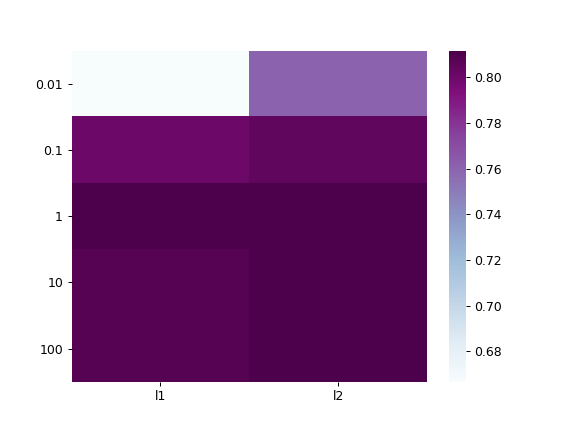

In [86]:
# Use the following function to help visualize results from the grid search
%matplotlib notebook
import seaborn as sns
import matplotlib.pyplot as plt

def GridSearch_Heatmap(scores):

    plt.figure()
    sns.heatmap(scores.reshape(5,2), 
                xticklabels=['l1','l2'], 
                yticklabels=[0.01, 0.1, 1, 10, 100],
                cmap = 'BuPu')
    
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())